# **Tutorial on MuJoCo**







---



# Introduction to MuJoCo
---
## What is MuJoCo?

MuJoCo (Multi-Joint dynamics with Contact) is a physics engine designed for efficient and accurate simulation of articulated structures with contacts. It is widely used in robotics, biomechanics, reinforcement learning, and physics-based animation.

## How is MuJoCo Used?

MuJoCo provides a flexible framework for simulating rigid body dynamics, including features such as soft contacts, actuators, and constraints. It is commonly used for:

- **Research in Robotics**: Testing robot controllers, reinforcement learning policies, and motion planning algorithms.
- **Biomechanics Simulations**: Modeling human and animal movement with accurate physics-based constraints.
- **Reinforcement Learning**: Simulating environments for AI agents to learn control policies.
- **Animation & Gaming**: Generating realistic physics-based character animations.

## Types of Applications

MuJoCo is applied in various fields, including:

- **Robotic Control**: Simulating robotic arms, quadrupeds, and humanoid robots.
- **Autonomous Vehicles**: Testing reinforcement learning models for self-driving cars.
- **Prosthetics & Exoskeletons**: Simulating biomechanics for medical applications.
- **Grasping and Manipulation**: Evaluating robotic grasping and object manipulation tasks.


For this tutorial we will be closely follwing the tutorial appear in:

Link: https://mujoco.readthedocs.io/en/stable/python.html

MuJoCo Documentation:

Link: https://mujoco.readthedocs.io/en/stable/overview.html



---



## Installing and Setting Up MuJoCo in Google Colab

The following code block installs and configures MuJoCo for use in Google Colab with GPU rendering.

### Steps Performed:

- **Install MuJoCo**: Uses `!pip install mujoco` to install the physics engine.
- **Set Up GPU Rendering**:
  - Checks if a GPU is available in the Colab environment.
  - Configures NVIDIA's EGL rendering backend for MuJoCo.
- **Verify Installation**:
  - Imports MuJoCo and ensures a minimal model can be created without errors.
  - Displays an error message if the installation fails.
- **Install Additional Dependencies**:
  - Installs `mediapy` for rendering and visualization.
  - Installs `ffmpeg` if it's not already available.
- **Set Up Environment for Simulations**:
  - Configures NumPy printing options for better readability.
  - Imports essential libraries (`time`, `itertools`, `numpy`, `matplotlib`).
  - Clears unnecessary output to keep the notebook clean.

After running this block, MuJoCo should be installed and ready for use with GPU acceleration in Google Colab.


In [1]:
!pip install mujoco

# Set up GPU rendering.
from google.colab import files
import distutils.util
import os
import subprocess

if subprocess.run('nvidia-smi').returncode:
  raise RuntimeError(
      'Cannot communicate with GPU. '
      'Make sure you are using a GPU Colab runtime. '
      'Go to the Runtime menu and select Choose runtime type.')

# Add an ICD config so that glvnd can pick up the Nvidia EGL driver.
# This is usually installed as part of an Nvidia driver package, but the Colab
# kernel doesn't install its driver via APT, and as a result the ICD is missing.
# (https://github.com/NVIDIA/libglvnd/blob/master/src/EGL/icd_enumeration.md)

NVIDIA_ICD_CONFIG_PATH = '/usr/share/glvnd/egl_vendor.d/10_nvidia.json'
if not os.path.exists(NVIDIA_ICD_CONFIG_PATH):
  with open(NVIDIA_ICD_CONFIG_PATH, 'w') as f:
    f.write("""{
    "file_format_version" : "1.0.0",
    "ICD" : {
        "library_path" : "libEGL_nvidia.so.0"
    }
}
""")

# Configure MuJoCo to use the EGL rendering backend (requires GPU)
print('Setting environment variable to use GPU rendering:')
%env MUJOCO_GL=egl

# Check if installation was succesful.
try:
  print('Checking that the installation succeeded:')
  import mujoco
  mujoco.MjModel.from_xml_string('<mujoco/>')
except Exception as e:
  raise e from RuntimeError(
      'Something went wrong during installation. Check the shell output above '
      'for more information.\n'
      'If using a hosted Colab runtime, make sure you enable GPU acceleration '
      'by going to the Runtime menu and selecting "Choose runtime type".')

print('Installation successful.')

# Other imports and helper functions
import time
import itertools
import numpy as np

# Graphics and plotting.
print('Installing mediapy:')
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy
import mediapy as media
import matplotlib.pyplot as plt

# More legible printing from numpy.
np.set_printoptions(precision=3, suppress=True, linewidth=100)

from IPython.display import clear_output
clear_output()


zsh:1: command not found: pip


ModuleNotFoundError: No module named 'google'

## Coding in MuJoCo with Python
---
MuJoCo provides a Python API that allows users to define and simulate physics-based models efficiently. Below are the key steps involved in writing MuJoCo code in Python.

### 1. **Defining a Model Using XML**  
MuJoCo models are specified in an XML format, where objects (bodies, joints, and constraints) are defined hierarchically. The XML file describes the physical properties, geometry, and dynamics of the simulation environment.

### 1. **Root Element (`<mujoco>`)**  
The XML file starts with the `<mujoco>` root element, which contains all simulation components.  

### 2. **World Definition (`<worldbody>`)**  
The `<worldbody>` element defines the simulation environment, including static and dynamic objects.  

### 3. **Geometries and Bodies (`<geom>` and `<body>`)**  
- `<geom>` defines basic geometric shapes such as boxes, spheres, and planes.  
- `<body>` defines physical entities that can move and interact.  

### 4. **Joints (`<joint>`)**  
Joints define how objects move. Common types include:  
- **Hinge (`hinge`)**: Rotates around one axis.  
- **Slide (`slide`)**: Moves along one axis.  
- **Ball (`ball`)**: Rotates freely in all directions.  

### 5. **Actuators (`<actuator>`)**  
Actuators apply forces or torques to move objects. A motor actuator, for example, applies torque to a hinge joint.  

### 6. **Sensors and Cameras**  
- **Cameras (`<camera>`)** define viewpoints in the simulation.  
- **Sensors (`<sensor>`)** record data like joint positions and forces.  

### 7. **Other Components**  
- **Lights (`<light>`)**: Controls scene illumination.  
- **Constraints (`<constraint>`)**: Defines physical restrictions like friction and contact behavior.  
- **Materials (`<material>`)**: Controls visual properties such as texture and reflectivity.  

Link: https://mujoco.readthedocs.io/en/stable/XMLreference.html


In [ ]:
#xml file that specifies the model

xml = """
<mujoco>
  <worldbody>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""

# This creats the MuJoCo model from the xml file
model = mujoco.MjModel.from_xml_string(xml)

# Model information retrival

---



##**mjModel**

## `mjModel` - The Model Structure
`mjModel` contains the definition of the simulation model. It is the static configuration that outlines the physical entities, joints, actuators, and other components specified in the MuJoCo XML file.

### Key Features of `mjModel`
- **Geometries (`<geom>`)**: Defines shapes and sizes of objects in the simulation (e.g., boxes, spheres, and planes).
- **Bodies (`<body>`)**: Describes the physical entities that make up the simulation environment, such as movable or fixed objects.
- **Joints (`<joint>`)**: Defines the types and ranges of movement between bodies (e.g., hinge, ball, and slide joints).
- **Actuators (`<actuator>`)**: Specifies forces or torques that can be applied to joints and bodies.
- **Sensors (`<sensor>`)**: Records data such as joint positions or forces during the simulation.

### Example

In [ ]:
print(rf'number of geoms:{model.ngeom}')
print('Color infromation of the geoms')
print(model.geom_rgba)

number of geoms:2
Color infromation of the geoms
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]]


Since we already know the names of the geoms available we can call them using "**Named Access**"

In [ ]:
model.geom('green_sphere')

<_MjModelGeomViews
  bodyid: array([0], dtype=int32)
  conaffinity: array([1], dtype=int32)
  condim: array([3], dtype=int32)
  contype: array([1], dtype=int32)
  dataid: array([-1], dtype=int32)
  friction: array([1.   , 0.005, 0.   ])
  gap: array([0.])
  group: array([0], dtype=int32)
  id: 1
  margin: array([0.])
  matid: array([-1], dtype=int32)
  name: 'green_sphere'
  pos: array([0.2, 0.2, 0.2])
  priority: array([0], dtype=int32)
  quat: array([1., 0., 0., 0.])
  rbound: array([0.1])
  rgba: array([0., 1., 0., 1.], dtype=float32)
  sameframe: array([3], dtype=uint8)
  size: array([0.1, 0. , 0. ])
  solimp: array([0.9  , 0.95 , 0.001, 0.5  , 2.   ])
  solmix: array([1.])
  solref: array([0.02, 1.  ])
  type: array([2], dtype=int32)
  user: array([], dtype=float64)
>

In [ ]:
print(rf"Size of green sphere: {model.geom('green_sphere').size}")
print(rf"rgba of red. box {model.geom('red_box').rgba}")


Size of green sphere: [0.1 0.  0. ]
rgba of red. box [1. 0. 0. 1.]


##**mjData**

## Overview of `mjData`

In MuJoCo, `mjData` is a crucial data structure that holds the real-time state of the simulation. While `mjModel` defines the setup of the model (i.e., how the environment and objects are configured), `mjData` tracks the evolving state of the simulation over time. Every time the simulation progresses, `mjData` updates with the latest values, such as positions, velocities, forces, and sensor readings.

### Role of `mjData`
- **Tracking Dynamic States**: `mjData` stores all the changing aspects of the simulation. This includes the positions, velocities, forces, and torques that change during each simulation step.
- **Sensor Data**: It captures real-time data from sensors specified in the model, such as joint angles, velocities, and contact forces.
- **Simulation Progress**: `mjData` keeps track of the simulation time and the number of simulation steps (iterations) that have occurred.

### Key Features of `mjData`
- **Positions and Velocities**: `mjData` tracks the positions and velocities of all bodies and joints in the simulation. These values are updated continuously as the simulation progresses.
- **Force and Torque Information**: It holds the forces and torques applied to the objects in the model, including external forces and those from actuators.
- **Sensor Data**: Any sensor data defined in the `mjModel` is recorded in `mjData`. For example, joint sensors that measure angles or force sensors that track contact forces.
- **Time and Iterations**: It tracks the time elapsed in the simulation and the current step or iteration number. This information helps to manage the simulation's progression and enables time-dependent analyses.

### How `mjData` Works
Each time the simulation steps forward, the values stored in `mjData` are updated. This includes:
- Positions and velocities of the objects and joints in the simulation.
- Forces and torques that are applied to the system.
- Updated readings from any sensors.




In [ ]:
data = mujoco.MjData(model)
print(data.geom_xpos)

#this outputs the position of the geoms relative to the parent body the geoms are on.
#However, MuJoCo does not automatically update global positions (in world coordinates) until the physics engine explicitly recomputes them.

mujoco.mj_kinematics(model, data)
print('raw access:\n', data.geom_xpos)

# MjData also supports named access:
print('\nnamed access:\n', data.geom('green_sphere').xpos)

[[0. 0. 0.]
 [0. 0. 0.]]
raw access:
 [[0.  0.  0. ]
 [0.2 0.2 0.2]]

named access:
 [0.2 0.2 0.2]


When you load a MuJoCo model, the global positions (xpos) and orientations (xmat) are not automatically computed. If you query an object's position before running the simulation, it might still be at the origin (0,0,0), even if you specified an offset in the XML file.*To* update these values correctly, you must explicitly call mj_kinematics.

# `mujoco.mj_kinematics` in MuJoCo

The function `mujoco.mj_kinematics` is used to compute the kinematics of the MuJoCo model. Specifically, it calculates the positions, velocities, and other related quantities of the bodies and joints in the simulation based on the current state. This is crucial for understanding the motion and interaction of objects in the simulation environment.




# Rendering a MuJoCo Model
---

## Overview
Rendering a model in MuJoCo involves generating visual outputs of the simulation, allowing you to observe the behavior and interactions of the defined objects and bodies. The rendering process involves several key steps, such as processing the model, updating the scene, and displaying the rendered image.

## Steps for Rendering
1. **Creating the Simulation Data**: The `mjData` object is created from the `mjModel` and represents the real-time state of the simulation.
   
   `data = mujoco.MjData(model)`

2. **Setting Up the Renderer**: The `Renderer` class is used to render the simulation. It allows you to visualize the model, including any changes made during the simulation step.

   `with mujoco.Renderer(model) as renderer:`

3. **Processing the Model**: The `mj_forward` function is called to process the entire model pipeline. This includes calculating the physics and updating the simulation state.

   `mujoco.mj_forward(model, data)  # Process the model pipeline`

4. **Updating the Scene**: The `update_scene` function updates the visual scene based on the current simulation state.

   `renderer.update_scene(data)  # Update the scene with the current data`

5. **Rendering the Image**: The `render` function generates an image based on the updated scene, and the `media.show_image` function displays the image.

   `media.show_image(renderer.render())  # Display the rendered image`

""

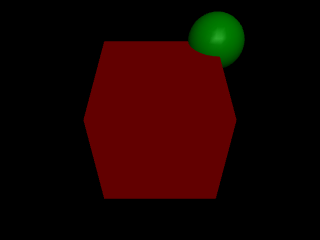

In [ ]:
data = mujoco.MjData(model)

with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data) #process the entrie model pipeline until accelaration computation.
  renderer.update_scene(data) #updates the scene

  media.show_image(renderer.render())

In MuJoCo, ***mj_forward*** is a more comprehensive update than ***mj_kinematics***. It processes the entire physics pipeline up to acceleration computation.

mj_forward computes:

*   **Kinematics:** Updates positions (xpos) and orientations (xmat) like mj_kinematics.
*   **Velocities:** Computes qvel (generalized velocities).
*   **Accelerations:** Computes qacc (generalized accelerations).
*   **Passive forces:** Includes gravity, Coriolis, and centrifugal effects.
*   **Actuation forces:** Updates actuator-related forces in qfrc_actuator.
*  **Contacts & Constraints:** Evaluates contacts but does NOT apply forces (use mj_step for that).

If you feel that the object is dark you can add a light to the model.

""

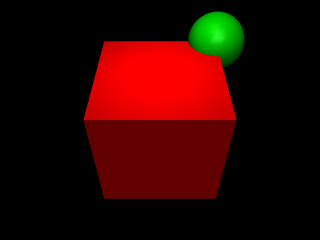

In [ ]:
xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)
  media.show_image(renderer.render())

### Let's Start Simulating

In [ ]:
#time in seconds
duration = 3.8
frame_rate = 60

#simulate and display

frames = []
with mujoco.Renderer(model) as renderer:
  while data.time<duration:
    # the default time step of MuJuCo is 2ms
    mujoco.mj_step(model,data)
    #the condition controls the frame rate to be the required frame_rate
    if len(frames) < duration * frame_rate:
      renderer.update_scene(data)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=frame_rate)

Nothing is moving ? This is because we haven't added any degrees of freedom to the bodies. Adding joints to a body introduces degrees of freedom to the body.

**Joints: Specify how a body moves with respect to it's parent body. **

In [ ]:
xml = """
<mujoco>
  <option gravity="0 0 -9.81"/>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 -30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)


# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

duration = 50  # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      renderer.update_scene(data, scene_option=scene_option)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)


Normally, the object should stop moving after some time. However, in MuJoCo the joints does not have damping by default.



```
<joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2" damping="5"/>
<joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2" range="-45 45"/>
<geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1" friction=".5 .5 .5"/>

```





# A Chaotic Pendulum

---



# Explanation of the Chaotic Pendulum Model in MuJoCo

The following XML file defines a chaotic pendulum system in MuJoCo, consisting of several linked bodies with joints. The model includes settings for simulation options, object definitions, and the overall structure of the pendulum.

## Breakdown of the XML Structure

### 1. **Simulation Options (`<option>`)**
- **`timestep=".001"`**: Sets the time step for the simulation to `0.001` seconds, controlling the precision of the simulation.
- **`<flag energy="enable" contact="disable"/>`**:
  - **`energy="enable"`**: Enables the calculation and monitoring of the system's energy.
  - **`contact="disable"`**: Disables contact forces, meaning the simulation won't handle collisions between bodies.

### 2. **Default Properties (`<default>`)**
- **`<joint type="hinge" axis="0 -1 0"/>`**: Defines a default joint of type "hinge" with the rotation axis along the negative y-axis (`0 -1 0`).
- **`<geom type="capsule" size=".02"/>`**: Defines a default geometry of type "capsule" with a size of `0.02` (likely the radius of the capsule).

### 3. **World Definition (`<worldbody>`)**
- **`<light pos="0 -.4 1"/>`**: Defines a light source located at position `(0, -0.4, 1)`.
- **`<camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>`**: Defines a fixed camera positioned at `(0, -1, 0)` with orientation axes specified.
- **`<body name="0" pos="0 0 .2">`**: The root body, positioned at `(0, 0, 0.2)`, contains the base elements of the pendulum.
  - **`<joint name="root"/>`**: A joint with no specified type (inherited from defaults), linking the body to the world.
  - **`<geom fromto="-.2 0 0 .2 0 0" rgba="1 1 0 1"/>`**: A yellow geometry (capsule) that spans from `(-0.2, 0, 0)` to `(0.2, 0, 0)`, representing the central rod of the pendulum.
  - **`<geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>`**: Another yellow capsule geometry that extends from `(0, 0, 0)` to `(0, 0, -0.25)`, part of the pendulum's structure.
- **Sub-bodies** (`body name="1"`, `body name="2"`, and `body name="3"`) are defined relative to the root body.
  - **`<joint/>`**: Joints for each body without specific parameters, likely inheriting from the default hinge joint type.
  - **`<geom fromto="0 0 0 0 0 -.2" rgba="1 0 0 1"/>`**: Each body has a geometry, where:
    - The first body is red.
    - The second body is green.
    - The third body is blue.

## Summary
This XML defines a pendulum system with multiple bodies connected by hinge joints. The pendulum has a light and camera for visualization and uses capsule-shaped geometries to represent the structure. The setup enables simulation of a chaotic pendulum system with energy calculations but without contact forces. The rendering configuration will display the pendulum from a fixed camera view.


""

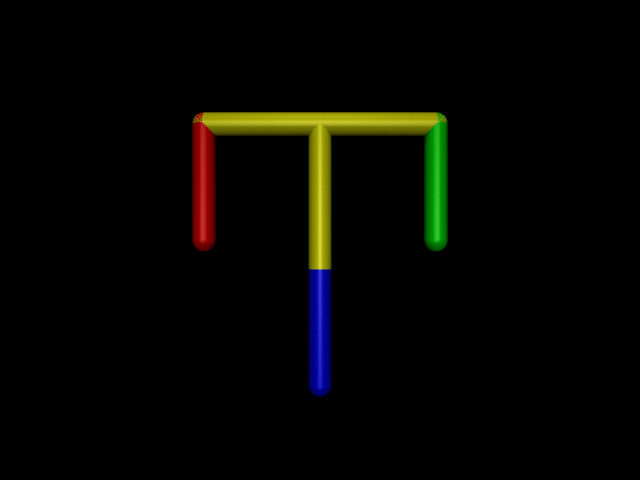

In [ ]:
chaotic_pendulum = """
<mujoco>
  <option timestep=".001">
    <flag energy="enable" contact="disable"/>
  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
    <body name="0" pos="0 0 .2">
      <joint name="root"/>
      <geom fromto="-.2 0 0 .2 0 0" rgba="1 1 0 1"/>
      <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>
      <body name="1" pos="-.2 0 0">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="1 0 0 1"/>
      </body>
      <body name="2" pos=".2 0 0">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 1 0 1"/>
      </body>
      <body name="3" pos="0 0 -.25">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
      </body>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(chaotic_pendulum)
data = mujoco.MjData(model)
height = 480
width = 640

with mujoco.Renderer(model, height, width) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data, camera="fixed")

  media.show_image(renderer.render())

In [ ]:
# setup
n_seconds = 6
framerate = 30  # Hz
n_frames = int(n_seconds * framerate)
frames = []

#resulution of the render frame
height = 240
width = 320

# set initial state
mujoco.mj_resetData(model, data)
#specify the angular velocity of the joint
data.joint('root').qvel = 10

# simulate and record frames
frame = 0
sim_time = 0
render_time = 0
n_steps = 0

with mujoco.Renderer(model, height, width) as renderer:
  for i in range(n_frames):
    #advances the simulation until the number number of required frames is achieved
    while data.time * framerate < i:
      #record time
      tic = time.time()
      #advances the model by a step
      mujoco.mj_step(model, data)
      #accumulating the total simulation time
      sim_time += time.time() - tic
      #accumulating the number of steps
      n_steps += 1
    #recording the time
    tic = time.time()
    #updating the scene before rendering. This updates all the positions and the orientations
    renderer.update_scene(data, "fixed")
    #rendering
    frame = renderer.render()
    #accumulating the rendering time
    render_time += time.time() - tic
    #appending the frames
    frames.append(frame)

# print timing and play

#average time per simulation step
step_time = 1e6*sim_time/n_steps
#steps per second
step_fps = n_steps/sim_time
print(f'simulation: {step_time:5.3g} μs/step  ({step_fps:5.0f}Hz)')
#average render time for a frame
frame_time = 1e6*render_time/n_frames
#number of frames rendered for a second
frame_fps = n_frames/render_time
print(f'rendering:  {frame_time:5.3g} μs/frame ({frame_fps:5.0f}Hz)')
print('\n')

# show video
media.show_video(frames, fps=framerate)

simulation:  7.47 μs/step  (133931Hz)
rendering:    801 μs/frame ( 1248Hz)


